In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import linkage_tree
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

Hierarchy using scipy

In [83]:
df = pd.read_csv('..\\Datasets\\simp_clust.csv', index_col=0)

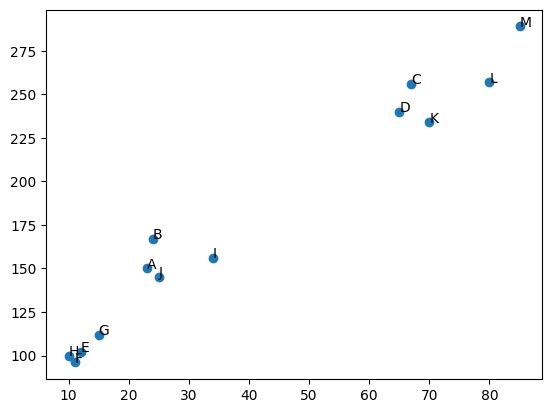

In [84]:
plt.scatter(df['X1'], df['X2'])
for i in range(0, df.shape[0]):
    plt.text(x=df['X1'].values[i], y=df['X2'].values[i], s=list(df.index)[i])

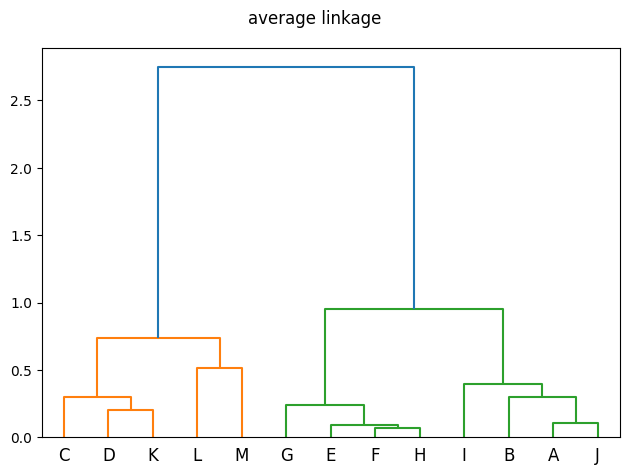

In [85]:
scaler = StandardScaler().set_output(transform='pandas')
df_scl = scaler.fit_transform(df)
link = 'average'
mergings = linkage(df_scl, method=link)
dendrogram(mergings, labels=list(df_scl.index))
plt.suptitle(link + ' linkage')
plt.tight_layout()
plt.show()

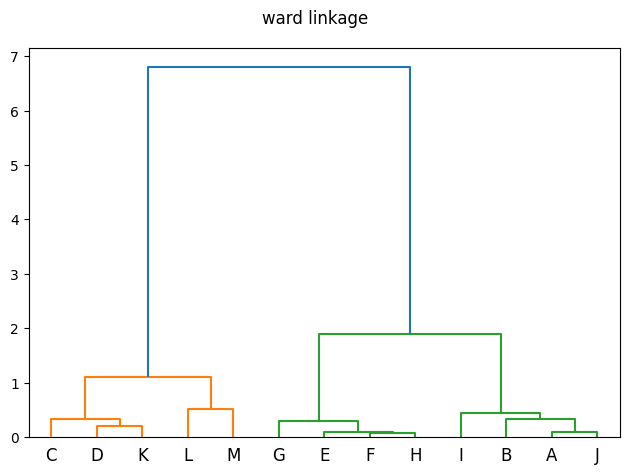

In [86]:
scaler = StandardScaler().set_output(transform='pandas')
df_scl = scaler.fit_transform(df)
link = 'ward'
mergings = linkage(df_scl, method=link)
dendrogram(mergings, labels=list(df_scl.index))
plt.suptitle(link + ' linkage')
plt.tight_layout()
plt.show()

In [87]:
# # test

# df.loc[['A', 'B', 'I', 'J']] = df.loc[['A', 'B', 'I', 'J']] - 5

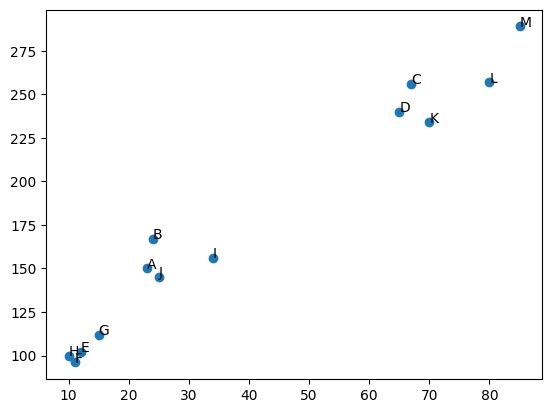

In [96]:
plt.scatter(df['X1'], df['X2'])
for i in range(0, df.shape[0]):
    plt.text(x=df['X1'].values[i], y=df['X2'].values[i], s=list(df.index)[i])

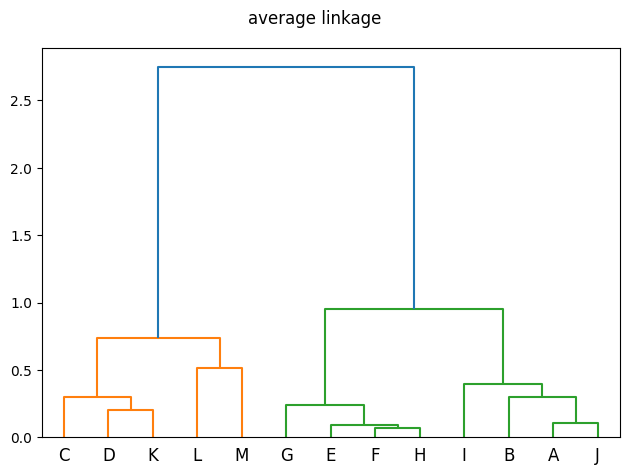

In [89]:
scaler = StandardScaler().set_output(transform='pandas')
df_scl = scaler.fit_transform(df)
link = 'average'
mergings = linkage(df_scl, method=link)
dendrogram(mergings, labels=list(df_scl.index))
plt.suptitle(link + ' linkage')
plt.tight_layout()
plt.show()

We have not created clusters yet, only hierarchy using scipy. Colors in dendrogram show suggested clusters.<br>
We use sklearn to perform agglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering


clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scl)
clust.labels_

array([1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0])

In [92]:
df_copy = df.copy()
df_copy['labels'] = clust.labels_
df_copy

,X1,X2,labels
Name,,,
A,23,150,1
B,24,167,1
C,67,256,0
D,65,240,0
E,12,102,2
F,11,96,2
G,15,112,2
H,10,100,2
I,34,156,1


In [97]:
df_copy.sort_values(by='labels')

,X1,X2,labels
Name,,,
D,65,240,0
C,67,256,0
K,70,234,0
L,80,257,0
M,85,289,0
J,25,145,1
B,24,167,1
A,23,150,1
I,34,156,1


2 clusters

In [99]:
clust = AgglomerativeClustering(n_clusters=2)
clust.fit(df_scl)
print(clust.labels_)
df_copy = df.copy()
df_copy['labels'] = clust.labels_
df_copy.sort_values(by='labels')

[0 0 1 1 0 0 0 0 0 0 1 1 1]


,X1,X2,labels
Name,,,
A,23,150,0
B,24,167,0
F,11,96,0
E,12,102,0
G,15,112,0
H,10,100,0
J,25,145,0
I,34,156,0
C,67,256,1


How many clusters are good? -> use metric Silhouette Score

In [106]:
from sklearn.metrics import silhouette_score
scores = []
num_clusters = np.arange(2, 8)
for n in num_clusters:

    clust = AgglomerativeClustering(n_clusters=n)
    clust.fit(df_scl)
    scores.append([n, silhouette_score(df_scl, clust.labels_)])

scores_df = pd.DataFrame(scores, columns=['number_of_clusters', 'silhouette_score'])
scores_df.sort_values('silhouette_score', ascending=False)

,number_of_clusters,silhouette_score
0,2,0.768625
1,3,0.748692
2,4,0.642185
3,5,0.570780
4,6,0.453127
5,7,0.451401


using different linkages

In [107]:
from sklearn.metrics import silhouette_score
from tqdm import tqdm

links = ['ward', 'single', 'complete', 'average']
scores = []
num_clusters = np.arange(2, 8)
for link in tqdm(links):

    for n in num_clusters:

        clust = AgglomerativeClustering(n_clusters=n, linkage=link)
        clust.fit(df_scl)
        scores.append([link, n, silhouette_score(df_scl, clust.labels_)])

scores_df = pd.DataFrame(scores, columns=['linkage','number_of_clusters', 'silhouette_score'])
scores_df.sort_values('silhouette_score', ascending=False)

100%|██████████| 4/4 [00:00<00:00, 42.23it/s]


,linkage,number_of_clusters,silhouette_score
0,ward,2,0.768625
6,single,2,0.768625
18,average,2,0.768625
12,complete,2,0.768625
13,complete,3,0.748692
19,average,3,0.748692
7,single,3,0.748692
1,ward,3,0.748692
14,complete,4,0.642185
20,average,4,0.642185
